## **Linear Regression**
We will use Linear regression for predicting house prices

We are using a Kaggle dataset- https://www.kaggle.com/harlfoxem/housesalesprediction

In [2]:
# Lets import required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


### **Dataset Preparation**

In [3]:
# Execute this cell for loading dataset in a pandas dataframe

from IPython.display import clear_output
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct' -O Linear_regression_dataset

data_df = pd.read_csv("Linear_regression_dataset")

--2024-12-09 17:28:31--  https://docs.google.com/uc?export=download&id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct
Resolving docs.google.com (docs.google.com)... 142.251.2.100, 142.251.2.138, 142.251.2.101, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct&export=download [following]
--2024-12-09 17:28:31--  https://drive.usercontent.google.com/download?id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.137.132, 2607:f8b0:4023:c03::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.137.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2515206 (2.4M) [application/octet-stream]
Saving to: ‘Linear_regression_dataset’

Linear_regression_d 100%[===================>]   2.40M  --.-KB

In [4]:
# Lets have a quick Look at dataset

print("(No of rows, No of Columns) = ",data_df.shape)
data_df.head()

(No of rows, No of Columns) =  (21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


So there are **19** features (of course we will not use id as feature :) ), and 1 variable to predict(price)

But note that the **date** column contain strings so first we will remove T00.. part from it and than convert it to numpy array.

In [5]:
data_df['date'] = data_df['date'].str.replace('T000000'," ")                    # Remove T000000 part from data column. Hint: search about .str.replace() method. :)

data_df['date'] = np.array(data_df['date'], dtype=float)
data_array = np.array(data_df.drop(['id'], axis=1))                             # Create a numpy array which does not have "id" field
assert (data_array.shape == (21613,20))

data_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013.0,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209.0,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225.0,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209.0,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218.0,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Now the next task is **normalization**.

We will scale each column of dataset by x -> (x-u)/s

where u is mean(x), and s is standard deviation of u

In [6]:
mean = np.mean(data_array, axis=0)                                  # this should be an array, each entry should be mean of a column
sd = np.std(data_array, axis=0)                                    # this should be an array, each entry should be standard deviation of a column

data_array_norm = (data_array - mean)/sd

print(data_array_norm.shape)

(21613, 20)


The last step is to make train and test dataset and to create seperate vector for price

In [7]:
labels = data_df["price"]                                                                                                           # extract the price column from data

x_array_norm = np.delete (data_array_norm ,1 ,axis =1)                                                                                                      # delete the price column from data_array_norm. Hint: use np.delete()

x_train, x_test, y_train, y_test = train_test_split(x_array_norm,labels,test_size=0.15,random_state=42,shuffle=True)    # splitting data into test and train set.

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(18371, 19) (3242, 19) (18371,) (3242,)


### **Loss and gradient descent**
We will use mean squared error(MSE) as loss

Use the gradient descent algorithm which you learned from tutorials

Your task is to complete the following functions

In [8]:
def loss(y_pred,y_true):
  """
  input:
  y_pred = [array] predicted value of y
  y_true = [array] ground truth

  output:
  mse: [scalar] the MES loss
  """
  mse = np.sum ((y_true - y_pred)**2) / len(y_true)                              # fill code here

  return mse

In [9]:
def y(x,a,b):
  """
  This function should return predicted value of y = ax+b
  input:
  x: [array] the feature vector of shape (m,n)
  a: [array] weights of shape (n,)
  b: [scalar] bias

  output:
  y_pred: [array] predicted value of y of shape (m,)
  """

  m,n = x.shape
  y_pred = np.dot(x,a) + b                   # fill code here

  assert(y_pred.shape == (m,))
  return y_pred

In [10]:
def gradient(x,a,b,y_true):
  """
  This function shoud return gradient of loss
  input:
  x: [array] the feature vector of shape (m,n)
  a: [array] weights of shape (n,)
  b: [scalar] bias
  y_true: [array] ground truth of shape (m,)

  output:
  grad: [tuple] a tuple (derivative with respect to a[array of shape(n,)], derivative with respect to b[scalar])
  """
  m,n = x.shape
  yp = y(x,a,b)

  da = -(2/m)*np.dot(x.T,y_true-yp)              # write code to calculate derivative of loss with respect to a
  db = -(2/m)*np.sum(y_true-yp)              # write code to calculate derivative of loss with respect to b

  assert(da.shape ==(n,))
  return (da,db)

In [12]:
def gradient_descent(x,y_true,learning_rate=0.01,epochs = 10):
  """
  This function perfroms gradient descent and minimizes loss
  input:
  x: [array] the feature vector of shape (m,n)
  y_true: [array] ground truth of shape (m,)

  output:
  loss: [array] of size (epochs,)
  weights: [tuple] (a,b)
  """
  m,n = x.shape
  loss_mse = []                                 # initialize empty list to store loss
  a = np.zeros(n)                                       # initialize a- weights and b- bias
  b = 0

  for i in range(epochs):
    # calculate derivative using gradient() function
    # apply gradient descent now to update a and b
    y_pred = y(x,a,b)
    a = a - learning_rate *gradient(x,a,b,y_true)[0]
    b = b - learning_rate *gradient(x,a,b,y_true)[1]

    l_mse = loss(y_pred,y_true)                                # calculate loss at this point
    loss_mse.append(l_mse)

    print("Epoch ",i+1," Completed!","loss = ",l_mse)

  print("Training completed!!")

  assert(a.shape==(n,))

  return (loss_mse,a,b)

### **Training**

In [21]:
epochs = 100              # tweak this!!!
learn_rate = 0.005          # choose learning rate wisely otherwise loss may diverge!!

train_loss,a,b = gradient_descent(x_train, y_train, learn_rate, epochs)

Epoch  1  Completed! loss =  421333293468.0863
Epoch  2  Completed! loss =  409079928118.67664
Epoch  3  Completed! loss =  397512942582.32184
Epoch  4  Completed! loss =  386575272870.3587
Epoch  5  Completed! loss =  376215327364.8782
Epoch  6  Completed! loss =  366386440874.55566
Epoch  7  Completed! loss =  357046383763.7139
Epoch  8  Completed! loss =  348156920579.5117
Epoch  9  Completed! loss =  339683413167.2253
Epoch  10  Completed! loss =  331594463771.367
Epoch  11  Completed! loss =  323861594076.6631
Epoch  12  Completed! loss =  316458956552.9345
Epoch  13  Completed! loss =  309363074836.35944
Epoch  14  Completed! loss =  302552610210.6842
Epoch  15  Completed! loss =  296008151549.4565
Epoch  16  Completed! loss =  289712026347.7097
Epoch  17  Completed! loss =  283648130711.7636
Epoch  18  Completed! loss =  277801776391.6977
Epoch  19  Completed! loss =  272159553135.04987
Epoch  20  Completed! loss =  266709204814.62973
Epoch  21  Completed! loss =  261439517939.9

### **Evaluation and Visualization**
Lets plot how loss varies with epochs


Loss on test data =  199972482061.332


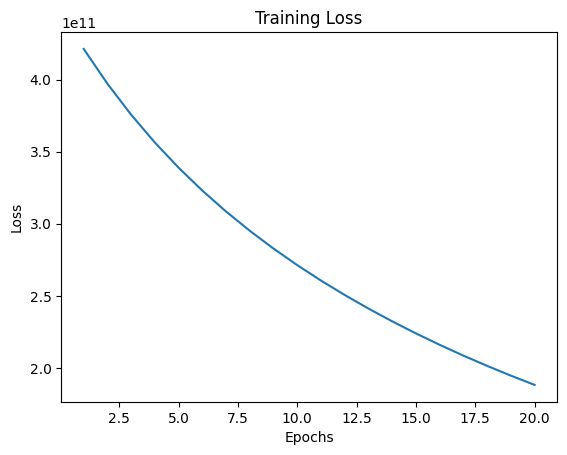

In [17]:
test_loss = loss(y(x_test, a, b), y_test)

print("Loss on test data = ",test_loss)

# Visualization of loss

plt.plot(np.arange(1, epochs + 1), train_loss)                                  # plot loss versus epochs
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## **Deep Learning**
In this section We will build a simple multilayer perceptron network(**MLP**) in TensorFlow

In [ ]:
# Lets import the required libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

### **Load Dataset**
We will be using MNIST dataset of handwritten digits

Just run the cell below to load dataset

In [ ]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("No. of training examples = ",x_train.shape[0])
print("Size of each image in dataset = ",x_train.shape[1:])
print("No. of test examples = ",x_test.shape[0])

No. of training examples =  60000
Size of each image in dataset =  (28, 28)
No. of test examples =  10000


label: 0       1       5       3       0       

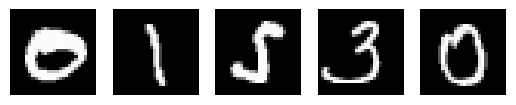

In [ ]:
# Run this cell to visualize some of the images from dataset

n = 5    # = no. of images to visualize

index = np.random.choice(x_train.shape[0],5)  # choose random index
print("label: ",end="")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_train[ind],cmap="gray")
    plt.axis("off")
    print(y_train[ind],end="       ")

plt.show()

#### Preprocess dataset
Since we are building a MLP model the input to the model should be a vector rather than a 28 by 28 matrix.

So your **First Task** is to flatten the images

(Hint: use *reshape()* method of arrays...)

Next, create validation dataset out of training dataset.

You can use 50K images for training and 10K for validation

In [ ]:
# Flatten the images into 1-d vectors
n_train, h, w = x_train.shape
n_test, h_test, w_test = x_test.shape
x_train_flatten = x_train.reshape(n_train, h * w)                               # flatten the images of training set
x_test_flatten = x_test.reshape(n_test, h_test * w_test)                        # flatten th eimages of test set

# Convert y_train, y_test to one-hot vectors,
y_test = keras.utils.to_categorical(y_test)
y_train = keras.utils.to_categorical(y_train)

# Divide the training data into training and validation data
n_validation = 10000                                                            # choose number of images to be used for validation

x_validation = x_train_flatten[:n_validation]
y_validation = y_train[:n_validation]

x_train_flatten = x_train_flatten[n_validation:]
y_train = y_train[n_validation:]



In [ ]:
y_train.shape

(50000, 10)

### **Build a model**
You can choose whatever architechure you want, but ensure that it is **not too deep** as that will take too much time to train and **not too shallow** as that will give very low accuracy.

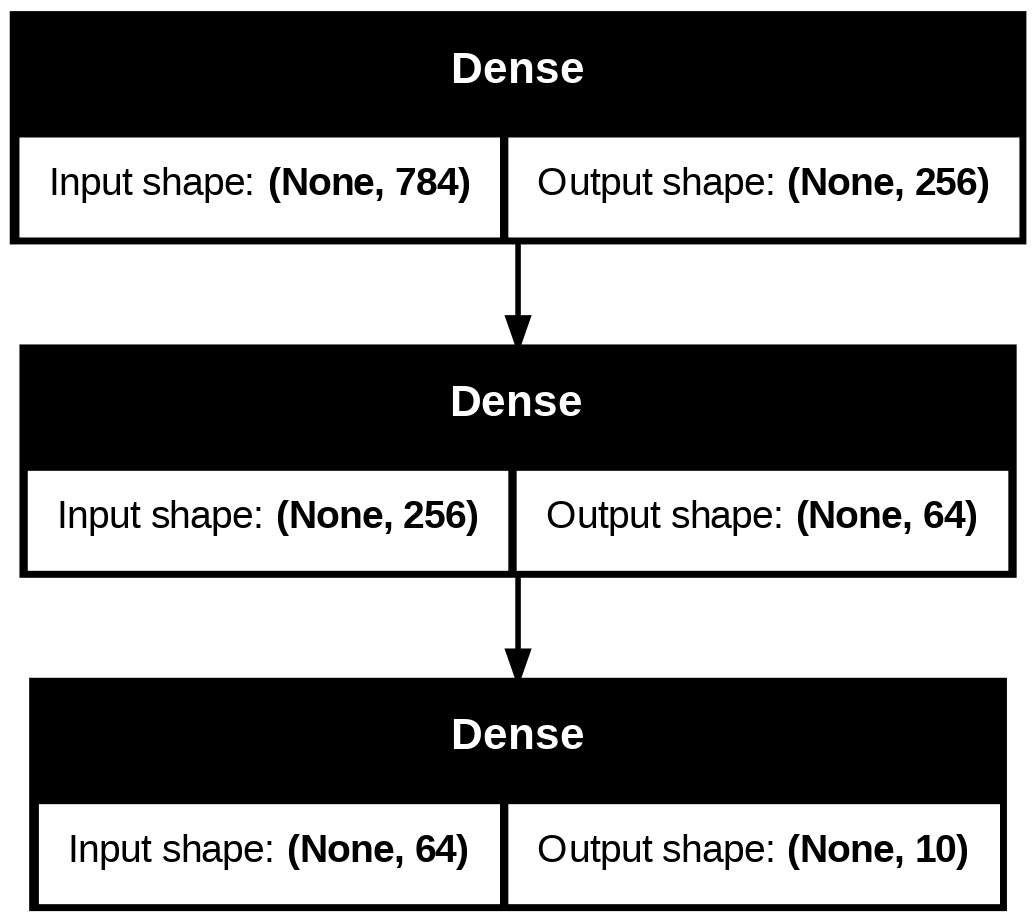

In [ ]:
input_shape = x_train_flatten.shape[1:]
num_classes = 10


model = keras.models.Sequential([
        keras.Input(shape=input_shape),
        layers.Dense(256, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation="softmax"),
])

# Make a graphical representation of the model...
keras.utils.plot_model(model,show_shapes=True)

# model.summary()

#### Compile and Train
Choose an optimizer- method that minimizes loss function

**adam** optimizer is one of the popular choices. You should read about these online

In [ ]:
model.compile(optimizer="adam",loss = "categorical_crossentropy",metrics=["accuracy"])

n_epochs = 20               # set number of epochs
batch_size = 512            # you can tweak with these parametrs
history = model.fit(x_train_flatten, y_train, batch_size=batch_size, epochs=n_epochs, validation_data=(x_validation, y_validation))

Epoch 1/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.6685 - loss: 19.8585 - val_accuracy: 0.8754 - val_loss: 1.2899
Epoch 2/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8861 - loss: 0.9452 - val_accuracy: 0.8825 - val_loss: 0.7469
Epoch 3/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9058 - loss: 0.4898 - val_accuracy: 0.9035 - val_loss: 0.5672
Epoch 4/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9277 - loss: 0.3260 - val_accuracy: 0.9125 - val_loss: 0.5158
Epoch 5/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9421 - loss: 0.2372 - val_accuracy: 0.9223 - val_loss: 0.4584
Epoch 6/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9554 - loss: 0.1740 - val_accuracy: 0.9279 - val_loss: 0.4332
Epoch 7/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9606 - loss: 0.1375 - val_accuracy: 0.9322 - val_loss: 0.3913
Epoch 8/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9667 - loss: 0.1137 - val_accuracy: 0.9358 - 

### **Evaluate**
Evaluate your model on test data.

And Show some results

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9451 - loss: 0.4423
Loss =  0.36327064037323
Accuracy =  95.24000287055969 %


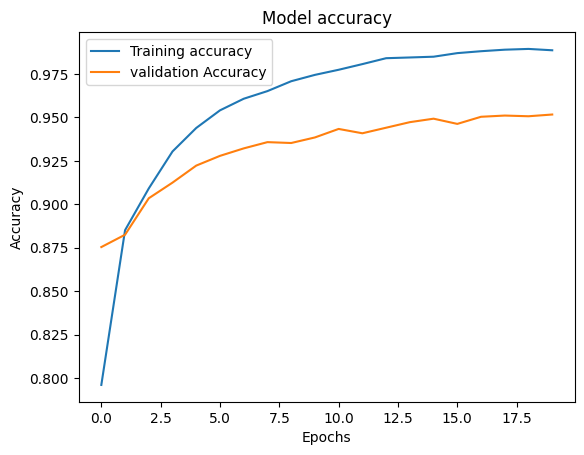

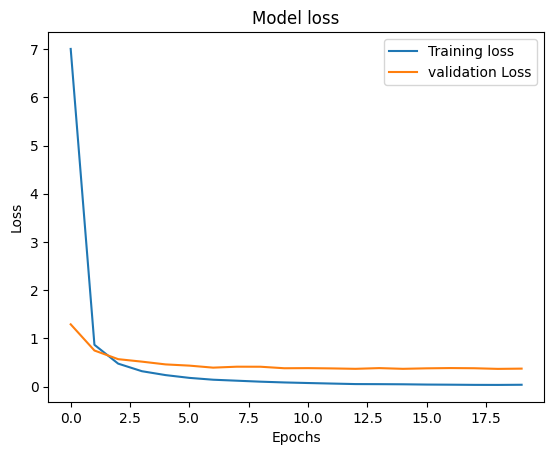

In [ ]:
results = model.evaluate(x_test_flatten, y_test, batch_size=512)
print("Loss = ",results[0])
print("Accuracy = ",results[1]*100,"%")

# Plot Accuracy...
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="validation Accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Similarly write code to plot loss...
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="validation Loss")
plt.title("Model loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


Lets show our results on images from testing dataset

label: 
3              6              9              2              8              

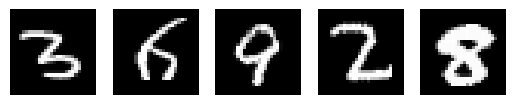

Predicted value: 
3              6              9              2              8              

In [ ]:
n =  5  # = no. of images to see predictions on

index = np.random.choice(x_test.shape[0], size = n)  # choose random index from test data
print("label: ")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_test[ind],cmap="gray")             # fill code to show images from test set
    plt.axis("off")
    print(np.argmax(y_test[ind]),end="              ")

plt.show()
print("Predicted value: ")

# # Now lets print the predictions

for i,ind in enumerate(index):
    # write code to predict and print digit in image
    # Hint: the output of the model is a 10-d vector which gives probabilties
    # The digit in the image would be the class for which probability is hghest...

    digit = np.argmax(model.predict(x_test_flatten[ind].reshape(1,784), verbose = 0))
    print(digit,end="              ")